In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
def preprocessing_inputs(df):
    df = df.copy()
    df = df.drop('CustomerID', axis = 1)
    
    encoder = LabelEncoder()
    df['Gender'] = encoder.fit_transform(df['Gender'])
    
    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(df), index = df.index, columns = df.columns)
    
    
    return df

In [4]:
df = preprocessing_inputs(df)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


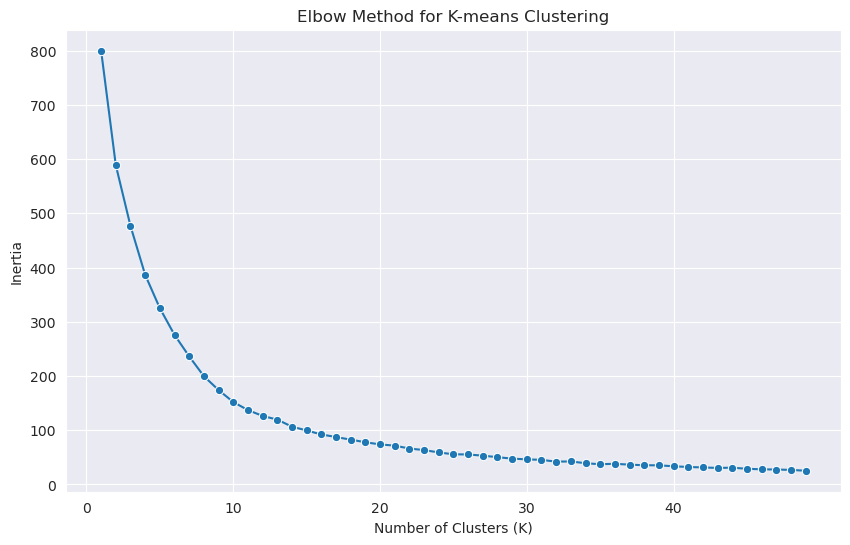

In [5]:
import seaborn as sns
sns.set_style("darkgrid")

max_clusters = 50
inertia_values = []

k_values = range(1, max_clusters)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-means Clustering')
plt.xticks(range(0, max_clusters, 10))
plt.show()

In [6]:
kmeans = KMeans(n_clusters = 10, n_init = 10)
kmeans.fit(df)

KMeans(n_clusters=10, n_init=10)

In [7]:
clusters = kmeans.predict(df)
clusters

array([9, 9, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 4, 0, 4, 9, 4, 9, 1, 0, 9, 9,
       4, 9, 4, 9, 4, 9, 4, 0, 1, 0, 1, 9, 4, 0, 4, 0, 4, 0, 5, 9, 1, 2,
       4, 0, 5, 2, 2, 2, 5, 9, 2, 1, 5, 1, 5, 1, 2, 1, 1, 9, 5, 5, 1, 9,
       5, 5, 9, 2, 1, 5, 5, 5, 1, 9, 5, 9, 2, 5, 1, 9, 1, 5, 2, 1, 5, 2,
       2, 5, 5, 9, 1, 2, 2, 9, 5, 2, 1, 9, 2, 5, 1, 9, 1, 2, 5, 1, 1, 1,
       1, 2, 2, 9, 2, 2, 5, 5, 5, 5, 9, 2, 2, 3, 2, 8, 6, 3, 1, 3, 6, 3,
       2, 8, 6, 8, 7, 3, 6, 8, 7, 3, 2, 8, 6, 3, 6, 8, 7, 3, 6, 3, 7, 8,
       7, 8, 6, 8, 6, 8, 5, 8, 6, 8, 6, 8, 6, 8, 7, 3, 6, 3, 6, 3, 7, 8,
       6, 3, 6, 3, 7, 8, 6, 8, 7, 3, 7, 3, 7, 8, 7, 8, 6, 8, 7, 8, 7, 3,
       6, 3], dtype=int32)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df = pd.DataFrame(pca.fit_transform(df), columns = ['PC1', 'PC2'])
df

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [9]:
kmeans.cluster_centers_

array([[-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [-0.88640526, -0.78153925, -0.12214217, -0.11957041],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ],
       [-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773]])

In [10]:
reduced_centers = pca.fit_transform(kmeans.cluster_centers_)
reduced_centers

array([[ 2.00314751, -0.66157808],
       [-1.29178751,  0.20457235],
       [ 0.59291734, -0.56440454],
       [ 0.452373  ,  1.96818892],
       [-0.36693855, -1.67139671],
       [-0.28247006, -0.96395187],
       [-1.69840555,  0.84708368],
       [-1.15521042, -0.46388989],
       [ 1.11151102,  0.46632056],
       [ 0.63486321,  0.83905559]])

In [11]:
clusters

array([9, 9, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 4, 0, 4, 9, 4, 9, 1, 0, 9, 9,
       4, 9, 4, 9, 4, 9, 4, 0, 1, 0, 1, 9, 4, 0, 4, 0, 4, 0, 5, 9, 1, 2,
       4, 0, 5, 2, 2, 2, 5, 9, 2, 1, 5, 1, 5, 1, 2, 1, 1, 9, 5, 5, 1, 9,
       5, 5, 9, 2, 1, 5, 5, 5, 1, 9, 5, 9, 2, 5, 1, 9, 1, 5, 2, 1, 5, 2,
       2, 5, 5, 9, 1, 2, 2, 9, 5, 2, 1, 9, 2, 5, 1, 9, 1, 2, 5, 1, 1, 1,
       1, 2, 2, 9, 2, 2, 5, 5, 5, 5, 9, 2, 2, 3, 2, 8, 6, 3, 1, 3, 6, 3,
       2, 8, 6, 8, 7, 3, 6, 8, 7, 3, 2, 8, 6, 3, 6, 8, 7, 3, 6, 3, 7, 8,
       7, 8, 6, 8, 6, 8, 5, 8, 6, 8, 6, 8, 6, 8, 7, 3, 6, 3, 6, 3, 7, 8,
       6, 3, 6, 3, 7, 8, 6, 8, 7, 3, 7, 3, 7, 8, 7, 8, 6, 8, 7, 8, 7, 3,
       6, 3], dtype=int32)

In [12]:
df['cluster'] = clusters

In [13]:
df

,PC1,PC2,cluster
0,-0.406383,-0.520714,9
1,-1.427673,-0.367310,9
2,0.050761,-1.894068,4
3,-1.694513,-1.631908,0
4,-0.313108,-1.810483,4
...,...,...,...
195,-1.179572,1.324568,8
196,0.672751,1.221061,7
197,-0.723719,2.765010,3
198,0.767096,2.861930,6


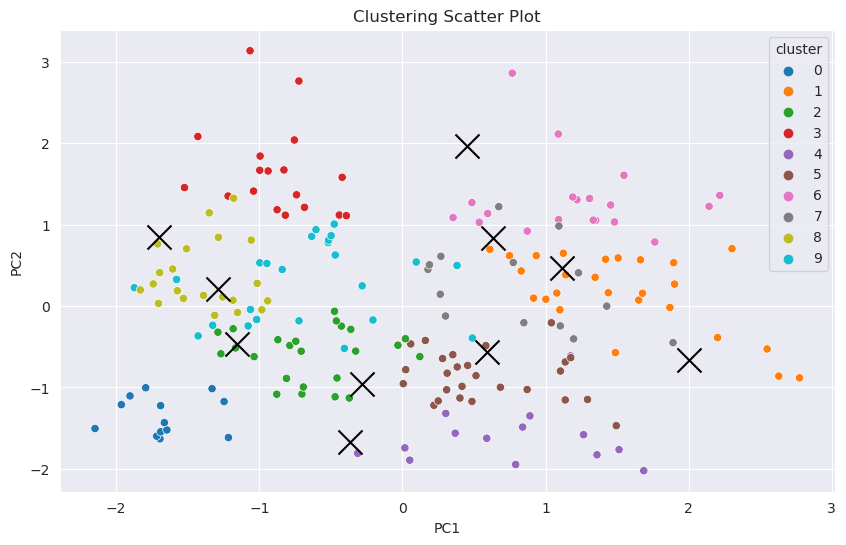

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

# Create a scatter plot with different colors for each cluster
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='tab10')
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)



# Set labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Scatter Plot')

# Show the plot
plt.show()